# Start of PCA

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
one_hot_encoded_df2 = pd.read_csv('data/model/actMath_11.csv')



In [3]:
# Dropping the specified columns
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'proficient_diff', 'is_proficient'])


In [4]:
one_hot_encoded_df2.head()

,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,...,course_YearbkII9-12,course_Yearbook9-12,course_YrbkIII9-12,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy
0,0.529412,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
1,0.529412,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
2,0.941176,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
3,0.941176,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
4,0.941176,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [101]:
one_hot_encoded_df2.columns.tolist()

['proficient_score',
 'course_ACT Review',
 'course_ACT/WK Rev.',
 'course_ACTReview.5C',
 'course_AG Communica',
 'course_AIDE-ELEM',
 'course_AIDE-LIB',
 'course_ALG I B ACCE',
 'course_ALIITRIGH/A',
 'course_ARMY LET I',
 'course_ARMY LET II',
 'course_ARMY LET III',
 'course_ARMY LET IV',
 'course_ARMYLETIVACT',
 'course_AcAdv.Baseba',
 'course_AcAdv.Basket',
 'course_AcAdv.CrossC',
 'course_AcAdv.Footb',
 'course_AcAdv.Softba',
 'course_AcAdv.Volley',
 'course_Accounting',
 'course_Adv BTA',
 'course_Advanced Agr',
 'course_Agriscience',
 'course_Alg Esntls B',
 'course_Alg II/Trig',
 'course_AlgEnrichmet',
 'course_AlgII/TrigAC',
 'course_Algebra I',
 'course_Algebra I A',
 'course_Algebra I B',
 'course_Algebra II',
 'course_AlgebraicCon',
 'course_Anat/Physio',
 'course_Anthropology',
 'course_Art App',
 'course_BAND MARCH',
 'course_BANDCONCERT',
 'course_BANDMARCHAUX',
 'course_BIOLOGY ADV',
 'course_Bak & Pstr A',
 'course_BandConcer.5',
 'course_BandConcer1C',
 'course_Band

## PCA

In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming `encoded_final_df` is your current DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_df2.drop(columns=['proficient_score']))

In [7]:
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 108
Cumulative explained variance: 0.803183671153641


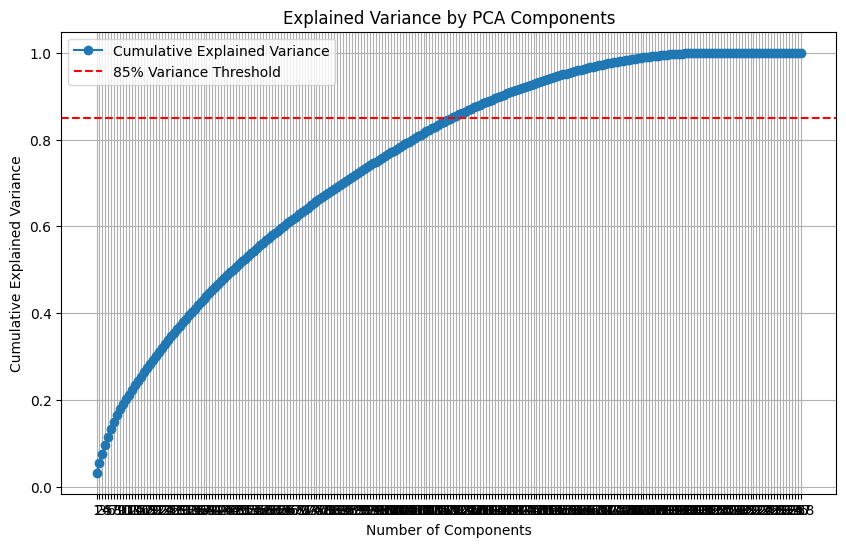

Number of components needed: 121


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_scaled is already defined and contains your scaled data
pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance Threshold')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()

# Calculate the number of components needed to explain at least 85% variance
components = np.argmax(cumulative_variance >= 0.85) + 1  # Add 1 to get the count of components
print(f"Number of components needed: {components}")


In [9]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [10]:
first_108_pcs_df = X_pca_df.iloc[:, :108].copy()

In [11]:
first_108_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108
0,0.109363,1.666291,24.116528,4.571970,-5.900160,-1.328985,3.571897,0.982600,-1.176280,8.538450,...,0.095875,0.234790,0.107747,-0.547898,-0.457518,0.123364,-0.397759,1.047355,-0.068832,-0.642952
1,0.109363,1.666291,24.116528,4.571970,-5.900160,-1.328985,3.571897,0.982600,-1.176280,8.538450,...,0.095875,0.234790,0.107747,-0.547898,-0.457518,0.123364,-0.397759,1.047355,-0.068832,-0.642952
2,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
3,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
4,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,0.276821,-0.777051,0.890722,-0.707012,1.229907,-0.562255,-1.334325,-3.006055,-1.929716,-0.163924,...,-0.000258,0.000164,0.000063,0.000306,0.001119,-0.001966,0.001897,0.000336,-0.001493,0.004474
3833,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569
3834,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569
3835,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569


In [12]:
import numpy as np

# Assuming pca is already fitted and X_scaled is available
# Get the PCA components (loadings)
components = pca.components_[:108]  # First 18 principal components

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])],
                                    index = one_hot_encoded_df2.drop(columns=['proficient_score']).columns)

# Find the most important features for each principal component
top_features = {}

for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features (you can adjust this number)
    top_features[pc] = sorted_features.head(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print(f'Top features for {pc}: {features}')

Top features for PC1: ['course_HEALTH 9-12', 'course_DRIVERS ED', 'course_D&TSafetyEd', 'school_High School B', 'course_Health 9-12']
Top features for PC2: ['course_Physical Sci', 'course_English Gr10', 'course_Algebra I B', 'course_Eng Gr10 Adv', 'course_ChemistryAdv']
Top features for PC3: ['course_Ess II:USHis', 'course_Ess: Phy Sci', 'course_Eng Ess 10', 'course_Alg Esntls B', 'course_RdIntrv7-12']
Top features for PC4: ['school_High School B', 'course_BullBogAdv', 'course_Panther Adv', 'school_High School A', 'course_HISTUS1877AC']
Top features for PC5: ['course_EnglGr10ACCE', 'course_PhySciACCESS', 'course_HealthACCESS', 'course_TranSer 11', 'course_Ess: E & SS']
Top features for PC6: ['course_Ess: E & SS', 'course_TranSer 11', 'course_Eng Ess 11', 'course_EssIII:USHis', 'course_Geo Ess']
Top features for PC7: ['course_EnglGr10ACCE', 'course_PhySciACCESS', 'course_HealthACCESS', 'course_USHisIG10ACC', 'course_AlgII/TrigAC']
Top features for PC8: ['school_High School D', 'course_E

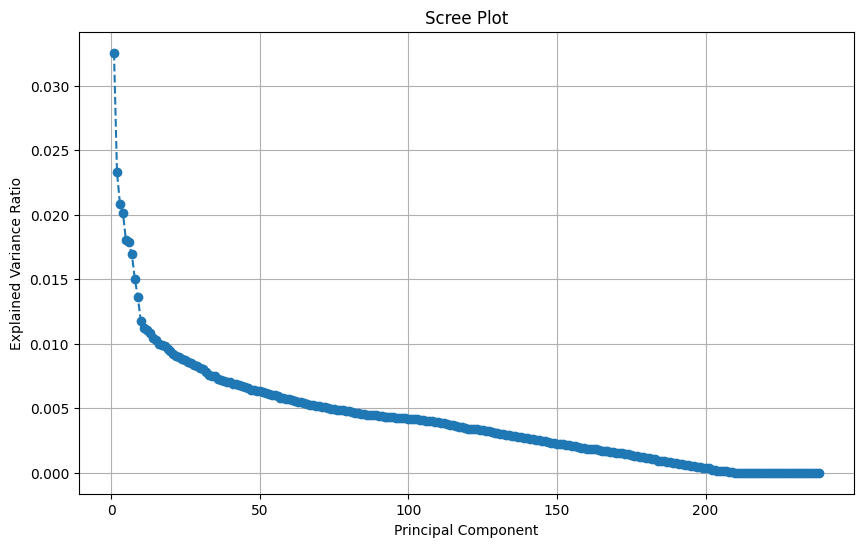

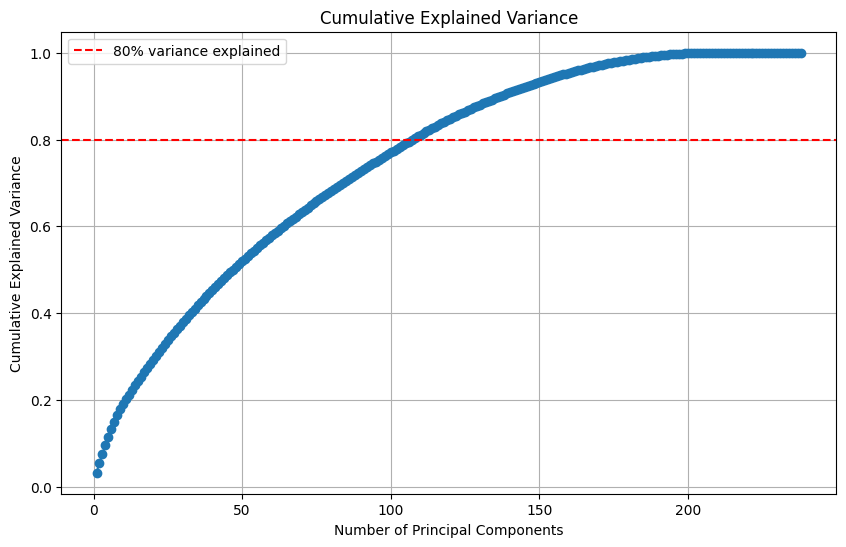

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


In [14]:

y = one_hot_encoded_df2['proficient_score']

In [15]:
first_108_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108
0,0.109363,1.666291,24.116528,4.571970,-5.900160,-1.328985,3.571897,0.982600,-1.176280,8.538450,...,0.095875,0.234790,0.107747,-0.547898,-0.457518,0.123364,-0.397759,1.047355,-0.068832,-0.642952
1,0.109363,1.666291,24.116528,4.571970,-5.900160,-1.328985,3.571897,0.982600,-1.176280,8.538450,...,0.095875,0.234790,0.107747,-0.547898,-0.457518,0.123364,-0.397759,1.047355,-0.068832,-0.642952
2,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
3,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
4,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,0.276821,-0.777051,0.890722,-0.707012,1.229907,-0.562255,-1.334325,-3.006055,-1.929716,-0.163924,...,-0.000258,0.000164,0.000063,0.000306,0.001119,-0.001966,0.001897,0.000336,-0.001493,0.004474
3833,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569
3834,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569
3835,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569


In [16]:
#!pip install catboost


# Start of Catboost

In [17]:

from sklearn.model_selection import train_test_split

import pandas as pd


In [1]:
import catboost

In [18]:
X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels


In [19]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2058636	test: 0.1903646	best: 0.1903646 (0)	total: 211ms	remaining: 1m 45s
50:	learn: 0.1404788	test: 0.1409107	best: 0.1409107 (50)	total: 1.95s	remaining: 17.1s
100:	learn: 0.1285473	test: 0.1316611	best: 0.1316611 (100)	total: 3.57s	remaining: 14.1s
150:	learn: 0.1223806	test: 0.1261502	best: 0.1261502 (150)	total: 5.21s	remaining: 12s
200:	learn: 0.1197780	test: 0.1240033	best: 0.1240033 (200)	total: 6.96s	remaining: 10.4s
250:	learn: 0.1183761	test: 0.1225963	best: 0.1225963 (250)	total: 8.89s	remaining: 8.81s
300:	learn: 0.1177122	test: 0.1220323	best: 0.1220323 (300)	total: 10.6s	remaining: 7.02s
350:	learn: 0.1172982	test: 0.1215866	best: 0.1215866 (350)	total: 12.4s	remaining: 5.25s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.121502858
bestIteration = 358

Shrink model to first 359 iterations.
Mean Squared Error (MSE): 0.01
R-squared (R²): 0.62
Root Mean Squared Error (RMSE): 0.12


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


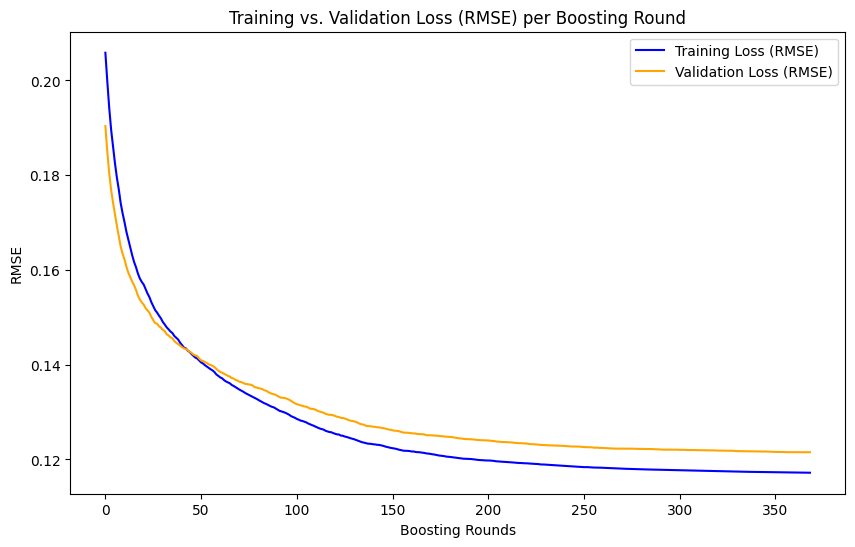

In [20]:
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Identify Categorical Features
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]

# Step 4: Prepare the CatBoost data pools
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Train the CatBoost Model with logging of evaluation metrics
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    cat_features=categorical_features_indices,
    eval_metric='RMSE'  # Set appropriate evaluation metric for regression
)

# Fit the model with early stopping
model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10  # Enable early stopping
)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Extract training and validation loss from the evals result
eval_history = model.get_evals_result()
train_loss = eval_history['learn']['RMSE']
validation_loss = eval_history['validation']['RMSE']

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()


In [72]:
import pandas as pd

# Get feature importance from CatBoost
feature_importances = model.get_feature_importance(prettified=True)

# Convert to DataFrame
feature_importances_df = pd.DataFrame(feature_importances)

# Filter for features with importance greater than 1
important_features_gr_2 = feature_importances_df[feature_importances_df['Importances'] > 2]

# Display important features
print("Features with importance > 2:")
important_features_gr_2 


Features with importance > 2:


,Feature Id,Importances
0,PC2,26.881736
1,PC4,4.238215
2,PC9,2.516621
3,PC5,2.258907


In [56]:
import pandas as pd
import numpy as np

# Assuming pca is already fitted and X_scaled is available
# Get the PCA components (loadings)
components = pca.components_[:108]  # First 18 principal components

# Create a DataFrame for feature loadings
feature_loadings_df2 = pd.DataFrame(
    components.T, 
    columns=[f'PC{i+1}' for i in range(components.shape[0])],
    index=one_hot_encoded_df2.drop(columns=['proficient_score']).columns
)

# Create a list to store rows for the new DataFrame
top_features_rows2 = []

# Find the most important features for each principal component
for pc in feature_loadings_df2.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features2 = feature_loadings_df2[pc].abs().sort_values(ascending=False)
    # Select the top 5 features
    for feature in sorted_features2.head(5).index:
        loading_value = feature_loadings_df2.loc[feature, pc]
        # Add a new row as a dictionary
        top_features_rows2.append({
            'Principal Component': pc,
            'Feature': feature,
            'Loading Value': loading_value
        })

# Convert the list of rows to a DataFrame
top_features_df2 = pd.DataFrame(top_features_rows)

# Reset index for cleanliness
top_features_df2.reset_index(drop=True, inplace=True)

# The DataFrame `top_features_df` now contains the results


In [68]:
top_features_df2 

,Principal Component,Feature,Loading Value
0,PC1,course_HEALTH 9-12,0.267672
1,PC1,course_DRIVERS ED,0.266102
2,PC1,course_D&TSafetyEd,-0.239470
3,PC1,school_High School B,0.238286
4,PC1,course_Health 9-12,-0.237900
...,...,...,...
535,PC108,course_Bus Tech App,0.318466
536,PC108,course_Const Frmng,0.266272
537,PC108,course_Vis Arts III,0.217288
538,PC108,course_Tran Serv II,0.202535


In [47]:
import pandas as pd
import numpy as np

# Assuming pca is already fitted and X_scaled is available
# Get the PCA components (loadings)
components = pca.components_[:108]  # First 18 principal components

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(
    components.T, 
    columns=[f'PC{i+1}' for i in range(components.shape[0])],
    index=one_hot_encoded_df2.drop(columns=['proficient_score']).columns
)

# Create a list to store rows for the new DataFrame
top_features_rows = []

# Find the most important features for each principal component
for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features
    top_features = sorted_features.head(5).index.tolist()
    # Add a new row as a dictionary
    top_features_rows.append(
        {'Feature Id': pc, 
         'Feature 1': top_features[0], 
         'Feature 2': top_features[1], 
         'Feature 3': top_features[2], 
         'Feature 4': top_features[3], 
         'Feature 5': top_features[4]}
    )

# Convert the list of rows to a DataFrame
top_features_df = pd.DataFrame(top_features_rows)

# The DataFrame `top_features_df` now contains the results


In [48]:
top_features_df

,Feature Id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,PC1,course_HEALTH 9-12,course_DRIVERS ED,course_D&TSafetyEd,school_High School B,course_Health 9-12
1,PC2,course_Physical Sci,course_English Gr10,course_Algebra I B,course_Eng Gr10 Adv,course_ChemistryAdv
2,PC3,course_Ess II:USHis,course_Ess: Phy Sci,course_Eng Ess 10,course_Alg Esntls B,course_RdIntrv7-12
3,PC4,school_High School B,course_BullBogAdv,course_Panther Adv,school_High School A,course_HISTUS1877AC
4,PC5,course_EnglGr10ACCE,course_PhySciACCESS,course_HealthACCESS,course_TranSer 11,course_Ess: E & SS
...,...,...,...,...,...,...
103,PC104,course_Int Ad Desgn,course_Food Nutritn,course_Robotics App,course_Multimed Des,course_Tran Serv I
104,PC105,course_Art App,course_VarBkbalII,course_MusicThry AP,course_VarSocII,course_Vocal I 1/2
105,PC106,course_Const Frmng,course_Int Metl Fab,course_SpanIACC,course_Yearbook9-12,course_MARKET PRIN
106,PC107,course_Speech 1,course_Inet Mktg,course_Piano .5C,course_Tran Serv II,course_Tran Serv I


In [66]:
import pandas as pd
import numpy as np

# Assuming pca is already fitted and X_scaled is available
# Get the PCA components (loadings)
pca_components = pca.components_[:108]  # First 18 principal components

# Create a DataFrame for feature loadings
loadings_df = pd.DataFrame(
    pca_components.T, 
    columns=[f'PC{i+1}' for i in range(pca_components.shape[0])],
    index=one_hot_encoded_df2.drop(columns=['proficient_score']).columns
)

# Create a list to store rows for the new DataFrame
top_features_data = []

# Find the most important features for each principal component
for principal_component in loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_loading_values = loadings_df[principal_component].abs().sort_values(ascending=False)
    # Select the top 5 features
    top_feature_names = sorted_loading_values.head(5).index.tolist()
    top_feature_loadings = sorted_loading_values.head(5).values.tolist()
    
    # Prepare a dictionary for the row, alternating between feature and loading value
    row_data = {'Feature Id': principal_component}  # Add PC number
    for idx in range(5):
        row_data[f'Feature {idx+1}'] = top_feature_names[idx]
        row_data[f'Loading Value {idx+1}'] = top_feature_loadings[idx]
    
    # Append the row to the list
    top_features_data.append(row_data)

# Convert the list of rows to a DataFrame with a new name
top_features_with_loadings_df = pd.DataFrame(top_features_data)

# Reset index for cleanliness
top_features_with_loadings_df.reset_index(drop=True, inplace=True)

# The DataFrame `top_features_with_loadings_df` now contains the results with features, loading vaues, and PC number
top_features_with_loadings_df


,Feature Id,Feature 1,Loading Value 1,Feature 2,Loading Value 2,Feature 3,Loading Value 3,Feature 4,Loading Value 4,Feature 5,Loading Value 5
0,PC1,course_HEALTH 9-12,0.267672,course_DRIVERS ED,0.266102,course_D&TSafetyEd,0.239470,school_High School B,0.238286,course_Health 9-12,0.237900
1,PC2,course_Physical Sci,0.312183,course_English Gr10,0.301171,course_Algebra I B,0.285069,course_Eng Gr10 Adv,0.279816,course_ChemistryAdv,0.277520
2,PC3,course_Ess II:USHis,0.382932,course_Ess: Phy Sci,0.366436,course_Eng Ess 10,0.360581,course_Alg Esntls B,0.354434,course_RdIntrv7-12,0.269269
3,PC4,school_High School B,0.280564,course_BullBogAdv,0.257950,course_Panther Adv,0.256315,school_High School A,0.256315,course_HISTUS1877AC,0.192760
4,PC5,course_EnglGr10ACCE,0.298660,course_PhySciACCESS,0.298660,course_HealthACCESS,0.262087,course_TranSer 11,0.257569,course_Ess: E & SS,0.257569
...,...,...,...,...,...,...,...,...,...,...,...
103,PC104,course_Int Ad Desgn,0.361327,course_Food Nutritn,0.298095,course_Robotics App,0.296505,course_Multimed Des,0.291003,course_Tran Serv I,0.189190
104,PC105,course_Art App,0.283373,course_VarBkbalII,0.247918,course_MusicThry AP,0.243721,course_VarSocII,0.190227,course_Vocal I 1/2,0.184409
105,PC106,course_Const Frmng,0.320560,course_Int Metl Fab,0.237490,course_SpanIACC,0.217530,course_Yearbook9-12,0.212299,course_MARKET PRIN,0.195678
106,PC107,course_Speech 1,0.285488,course_Inet Mktg,0.216028,course_Piano .5C,0.201524,course_Tran Serv II,0.193491,course_Tran Serv I,0.188935


In [99]:
# Merge important_features and feature_importances_df on 'Feature Id'
merged_features_df_catboost = important_features_gr_2.merge(top_features_df, on='Feature Id', how='inner')

# Display the merged DataFrame
print("Merged DataFrame:")
merged_features_df_catboost


Merged DataFrame:


,Feature Id,Importances,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,PC2,26.881736,course_Physical Sci,course_English Gr10,course_Algebra I B,course_Eng Gr10 Adv,course_ChemistryAdv
1,PC4,4.238215,school_High School B,course_BullBogAdv,course_Panther Adv,school_High School A,course_HISTUS1877AC
2,PC9,2.516621,course_Enviro Sci,course_English Gr11,course_USHis InD-P,course_USHis 1877-P,course_Credit Recov
3,PC5,2.258907,course_EnglGr10ACCE,course_PhySciACCESS,course_HealthACCESS,course_TranSer 11,course_Ess: E & SS


In [98]:
# Merge important_features and feature_importances_df on 'Feature Id'
merged_features_df_catboost2 = important_features_gr_2.merge(top_features_with_loadings_df, on='Feature Id', how='inner')

# Display the merged DataFrame
print("Merged DataFrame:")
merged_features_df_catboost2


Merged DataFrame:


,Feature Id,Importances,Feature 1,Loading Value 1,Feature 2,Loading Value 2,Feature 3,Loading Value 3,Feature 4,Loading Value 4,Feature 5,Loading Value 5
0,PC2,26.881736,course_Physical Sci,0.312183,course_English Gr10,0.301171,course_Algebra I B,0.285069,course_Eng Gr10 Adv,0.279816,course_ChemistryAdv,0.277520
1,PC4,4.238215,school_High School B,0.280564,course_BullBogAdv,0.257950,course_Panther Adv,0.256315,school_High School A,0.256315,course_HISTUS1877AC,0.192760
2,PC9,2.516621,course_Enviro Sci,0.385965,course_English Gr11,0.374048,course_USHis InD-P,0.354236,course_USHis 1877-P,0.243182,course_Credit Recov,0.187190
3,PC5,2.258907,course_EnglGr10ACCE,0.298660,course_PhySciACCESS,0.298660,course_HealthACCESS,0.262087,course_TranSer 11,0.257569,course_Ess: E & SS,0.257569


In [100]:
# Assuming `correlation_df` and `merged_features_df4` are already created

# Merge correlation_df with merged_features_df4 on 'Feature Id'
final_merged_df_catboost = merged_features_df_catboost.merge(correlation_df, on='Feature Id', how='inner')

# Display the merged DataFrame
print("Final Merged DataFrame:")
final_merged_df_catboost.head()


Final Merged DataFrame:


,Feature Id,Importances,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,correlation
0,PC2,26.881736,course_Physical Sci,course_English Gr10,course_Algebra I B,course_Eng Gr10 Adv,course_ChemistryAdv,negative
1,PC4,4.238215,school_High School B,course_BullBogAdv,course_Panther Adv,school_High School A,course_HISTUS1877AC,negative
2,PC9,2.516621,course_Enviro Sci,course_English Gr11,course_USHis InD-P,course_USHis 1877-P,course_Credit Recov,positive
3,PC5,2.258907,course_EnglGr10ACCE,course_PhySciACCESS,course_HealthACCESS,course_TranSer 11,course_Ess: E & SS,negative


# final XGBoost model

Cross-Validated MSE: 0.02
[0]	train-rmse:0.20121	eval-rmse:0.18618
[1]	train-rmse:0.19114	eval-rmse:0.17743
[2]	train-rmse:0.18274	eval-rmse:0.17039
[3]	train-rmse:0.17554	eval-rmse:0.16441
[4]	train-rmse:0.16895	eval-rmse:0.15937
[5]	train-rmse:0.16349	eval-rmse:0.15473
[6]	train-rmse:0.15834	eval-rmse:0.15061
[7]	train-rmse:0.15429	eval-rmse:0.14729
[8]	train-rmse:0.15084	eval-rmse:0.14439
[9]	train-rmse:0.14742	eval-rmse:0.14166
[10]	train-rmse:0.14501	eval-rmse:0.13988
[11]	train-rmse:0.14265	eval-rmse:0.13842
[12]	train-rmse:0.14050	eval-rmse:0.13673
[13]	train-rmse:0.13853	eval-rmse:0.13528
[14]	train-rmse:0.13683	eval-rmse:0.13408
[15]	train-rmse:0.13539	eval-rmse:0.13318
[16]	train-rmse:0.13432	eval-rmse:0.13265
[17]	train-rmse:0.13312	eval-rmse:0.13168
[18]	train-rmse:0.13182	eval-rmse:0.13083
[19]	train-rmse:0.13095	eval-rmse:0.13034
[20]	train-rmse:0.12973	eval-rmse:0.12946
[21]	train-rmse:0.12890	eval-rmse:0.12913
[22]	train-rmse:0.12816	eval-rmse:0.12872
[23]	train-rmse:0.

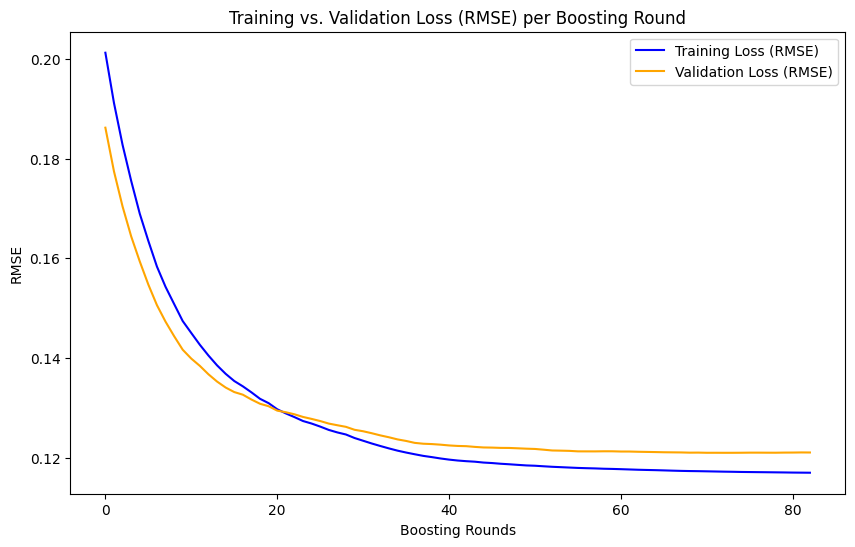

XGBoost - MSE: 0.01, R²: 0.62, RMSE: 0.12


In [23]:
from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the XGBRegressor with additional regularization and reduced complexity
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,       # Reduced depth to limit complexity
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# Run cross-validation to get an estimate of the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE: {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for the XGBoost model
params = {
    'max_depth': 6, #this affects the r2 th emost
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Update evals list to include both training and validation sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train the XGBoost model with early stopping, tracking both training and validation losses
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract train and eval loss from evals_result
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Make predictions on the test set
xgb_y_pred = xgb_model_trained.predict(dtest)

# Evaluate the model's performance on the test set
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")


In [83]:

feature_importances_xgb = xgb_model_trained.get_score(importance_type='weight')

# Convert to DataFrame for easy handling
feature_importances_xgb  = pd.DataFrame(
    list(feature_importances_xgb.items()), columns=['Feature Id', 'Importance']
)

# Sort features by importance in descending order
feature_importances_xgb = feature_importances_xgb.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
feature_importances_xgb

Feature Importances:


,Feature Id,Importance
1,PC2,216.0
0,PC1,168.0
2,PC3,87.0
3,PC4,82.0
4,PC5,63.0
...,...,...
67,PC68,15.0
97,PC98,13.0
79,PC80,12.0
89,PC90,11.0


In [84]:
feature_importances_xgb[feature_importances_xgb['Importance'] > 60]

,Feature Id,Importance
1,PC2,216.0
0,PC1,168.0
2,PC3,87.0
3,PC4,82.0
4,PC5,63.0


In [87]:
# Merge important_features and feature_importances_df on 'Feature Id'
merged_features_df3 = feature_importances_xgb.merge(top_features_with_loadings_df, on='Feature Id', how='inner')

# Display the merged DataFrame
print("Merged DataFrame:")
merged_features_df3[:5]


Merged DataFrame:


,Feature Id,Importance,Feature 1,Loading Value 1,Feature 2,Loading Value 2,Feature 3,Loading Value 3,Feature 4,Loading Value 4,Feature 5,Loading Value 5
0,PC2,216.0,course_Physical Sci,0.312183,course_English Gr10,0.301171,course_Algebra I B,0.285069,course_Eng Gr10 Adv,0.279816,course_ChemistryAdv,0.277520
1,PC1,168.0,course_HEALTH 9-12,0.267672,course_DRIVERS ED,0.266102,course_D&TSafetyEd,0.239470,school_High School B,0.238286,course_Health 9-12,0.237900
2,PC3,87.0,course_Ess II:USHis,0.382932,course_Ess: Phy Sci,0.366436,course_Eng Ess 10,0.360581,course_Alg Esntls B,0.354434,course_RdIntrv7-12,0.269269
3,PC4,82.0,school_High School B,0.280564,course_BullBogAdv,0.257950,course_Panther Adv,0.256315,school_High School A,0.256315,course_HISTUS1877AC,0.192760
4,PC5,63.0,course_EnglGr10ACCE,0.298660,course_PhySciACCESS,0.298660,course_HealthACCESS,0.262087,course_TranSer 11,0.257569,course_Ess: E & SS,0.257569


In [88]:
# Merge important_features and feature_importances_df on 'Feature Id'
merged_features_df4 = feature_importances_xgb.merge(top_features_df, on='Feature Id', how='inner')

# Display the merged DataFrame
print("Merged DataFrame:")
merged_features_df4[:5]


Merged DataFrame:


,Feature Id,Importance,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,PC2,216.0,course_Physical Sci,course_English Gr10,course_Algebra I B,course_Eng Gr10 Adv,course_ChemistryAdv
1,PC1,168.0,course_HEALTH 9-12,course_DRIVERS ED,course_D&TSafetyEd,school_High School B,course_Health 9-12
2,PC3,87.0,course_Ess II:USHis,course_Ess: Phy Sci,course_Eng Ess 10,course_Alg Esntls B,course_RdIntrv7-12
3,PC4,82.0,school_High School B,course_BullBogAdv,course_Panther Adv,school_High School A,course_HISTUS1877AC
4,PC5,63.0,course_EnglGr10ACCE,course_PhySciACCESS,course_HealthACCESS,course_TranSer 11,course_Ess: E & SS


In [90]:
import pandas as pd

# Assuming `principal_components_df` has columns: ['PC1', 'PC2', ..., 'PCn'] with PCA scores
# And `y_train` is the label variable (target)

# Calculate correlation between each PC and the label
correlations = first_108_pcs_df.corrwith(y_train)

# Now print or visualize the correlation
print("Correlation between each PC and the label:")
print(correlations)

# You can check if PC1 is positively or negatively correlated with the label
for pc, corr in correlations.items():
    if corr > 0:
        print(f"{pc} is positively correlated with the label")
    elif corr < 0:
        print(f"{pc} is negatively correlated with the label")
    else:
        print(f"{pc} has no correlation with the label")


Correlation between each PC and the label:
PC1      0.122999
PC2     -0.454828
PC3     -0.114599
PC4     -0.202768
PC5     -0.161309
           ...   
PC104    0.033969
PC105   -0.028614
PC106   -0.051018
PC107    0.018251
PC108    0.019146
Length: 108, dtype: float64
PC1 is positively correlated with the label
PC2 is negatively correlated with the label
PC3 is negatively correlated with the label
PC4 is negatively correlated with the label
PC5 is negatively correlated with the label
PC6 is positively correlated with the label
PC7 is positively correlated with the label
PC8 is positively correlated with the label
PC9 is positively correlated with the label
PC10 is negatively correlated with the label
PC11 is positively correlated with the label
PC12 is negatively correlated with the label
PC13 is positively correlated with the label
PC14 is positively correlated with the label
PC15 is negatively correlated with the label
PC16 is negatively correlated with the label
PC17 is positively c

In [92]:
import pandas as pd

# Assuming `first_108_pcs_df` contains PCA scores for the first 108 PCs,
# and `y_train` is your label variable (target).

# Calculate correlation between each PC and the label
correlations = first_108_pcs_df.corrwith(y_train)

# Create an empty list to store the results
correlation_data = []

# Iterate through the correlations and classify as 'positive' or 'negative'
for pc, corr in correlations.items():
    correlation_type = 'positive' if corr > 0 else 'negative' if corr < 0 else 'no correlation'
    correlation_data.append({'Feature Id': pc, 'correlation': correlation_type})

# Convert the list of results into a DataFrame
correlation_df = pd.DataFrame(correlation_data)

# Display the DataFrame
correlation_df


,Feature Id,correlation
0,PC1,positive
1,PC2,negative
2,PC3,negative
3,PC4,negative
4,PC5,negative
...,...,...
103,PC104,positive
104,PC105,negative
105,PC106,negative
106,PC107,positive


In [94]:
# Assuming `correlation_df` and `merged_features_df4` are already created

# Merge correlation_df with merged_features_df4 on 'Feature Id'
final_merged_df = merged_features_df3.merge(correlation_df, on='Feature Id', how='inner')

# Display the merged DataFrame
print("Final Merged DataFrame:")
final_merged_df.head()


Final Merged DataFrame:


,Feature Id,Importance,Feature 1,Loading Value 1,Feature 2,Loading Value 2,Feature 3,Loading Value 3,Feature 4,Loading Value 4,Feature 5,Loading Value 5,correlation
0,PC2,216.0,course_Physical Sci,0.312183,course_English Gr10,0.301171,course_Algebra I B,0.285069,course_Eng Gr10 Adv,0.279816,course_ChemistryAdv,0.277520,negative
1,PC1,168.0,course_HEALTH 9-12,0.267672,course_DRIVERS ED,0.266102,course_D&TSafetyEd,0.239470,school_High School B,0.238286,course_Health 9-12,0.237900,positive
2,PC3,87.0,course_Ess II:USHis,0.382932,course_Ess: Phy Sci,0.366436,course_Eng Ess 10,0.360581,course_Alg Esntls B,0.354434,course_RdIntrv7-12,0.269269,negative
3,PC4,82.0,school_High School B,0.280564,course_BullBogAdv,0.257950,course_Panther Adv,0.256315,school_High School A,0.256315,course_HISTUS1877AC,0.192760,negative
4,PC5,63.0,course_EnglGr10ACCE,0.298660,course_PhySciACCESS,0.298660,course_HealthACCESS,0.262087,course_TranSer 11,0.257569,course_Ess: E & SS,0.257569,negative


In [96]:
# Assuming `correlation_df` and `merged_features_df4` are already created

# Merge correlation_df with merged_features_df4 on 'Feature Id'
final_merged_df2 = merged_features_df4.merge(correlation_df, on='Feature Id', how='inner')

# Display the merged DataFrame
print("Final Merged DataFrame:")
final_merged_df2.head()


Final Merged DataFrame:


,Feature Id,Importance,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,correlation
0,PC2,216.0,course_Physical Sci,course_English Gr10,course_Algebra I B,course_Eng Gr10 Adv,course_ChemistryAdv,negative
1,PC1,168.0,course_HEALTH 9-12,course_DRIVERS ED,course_D&TSafetyEd,school_High School B,course_Health 9-12,positive
2,PC3,87.0,course_Ess II:USHis,course_Ess: Phy Sci,course_Eng Ess 10,course_Alg Esntls B,course_RdIntrv7-12,negative
3,PC4,82.0,school_High School B,course_BullBogAdv,course_Panther Adv,school_High School A,course_HISTUS1877AC,negative
4,PC5,63.0,course_EnglGr10ACCE,course_PhySciACCESS,course_HealthACCESS,course_TranSer 11,course_Ess: E & SS,negative


## gradient boosting

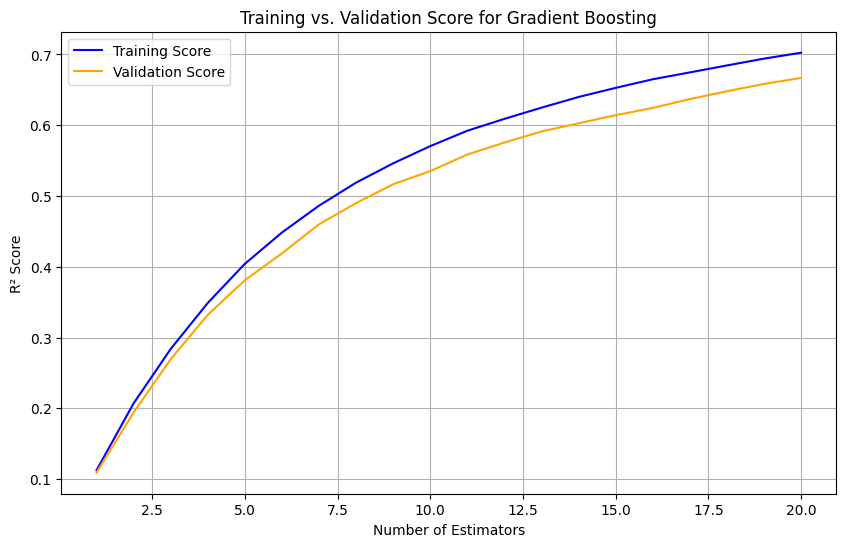

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Example: Ensure your X_train and y_train are defined
# X_train = ... (your features)
# y_train = ... (your target variable)

# Step 1: Initialize lists for scores
train_scores = []
test_scores = []

# Step 2: Iterate through a reduced number of estimators
for i in range(1, 21):  # Reduced to 20 for faster computation
    gb_model = GradientBoostingRegressor(n_estimators=i, learning_rate=0.1, random_state=42)
    
    # Use cross-validation for training score
    train_cv_score = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_cv_score)

    # Fit the model on the full training data
    gb_model.fit(X_train, y_train)
    
    # Calculate validation score
    test_scores.append(gb_model.score(X_test, y_test))

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_scores, label='Training Score', color='blue')
plt.plot(range(1, 21), test_scores, label='Validation Score', color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')
plt.title('Training vs. Validation Score for Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()


# summary of common important features (will update)

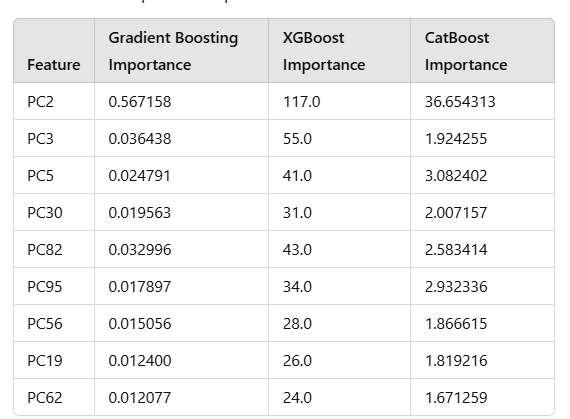

PC2 is highly important across all three models, showing consistent importance.
PC3 and PC5 also appear in all three models, but their importance values vary significantly between them.
The importance values from XGBoost and CatBoost are much higher compared to Gradient Boosting, indicating that those models might be more sensitive to these features.
Other features such as PC30, PC82, and PC95 appear to be important across multiple models, though they have varying levels of importance.

mportant Features for Principal Components
PC2:

Top Features:
course_ChemistryAdv
course_Eng Gr10 Adv
course_Physical Sci
course_USHis I Adv
course_English Gr10
Observation: Consistently important across all models, indicating its significant contribution to explaining variance.
PC3:

Top Features:
studentId
course_Ess II:USHis
course_Ess: Phy Sci
course_Eng Ess 10
course_Alg Esntls B
Observation: Appears in all models, but its importance may vary significantly, suggesting it's sensitive to the modeling approach.
PC5:

Top Features:
course_Ess II:USHis
course_Ess: Phy Sci
studentId
course_Eng Ess 10
course_Alg Esntls B
Observation: Similar to PC3, its importance is variable across models, emphasizing that these features may have varying impacts.
Other Notable PCs:

PC30:
Top features: course_Marine Sci, course_LATIN 1 ACC, course_VarBkbalI, course_VisArtI.5C, course_AIDE-LIB
Importance: Important across multiple models.
PC82 and PC95: While their specific top features were not listed in your output, the mention of their importance suggests that they too play a crucial role in the models being analyzed.
Summary of Observations
PC2 is a strong indicator across all models, implying that it holds a significant relationship with the output variable you are studying.
PC3 and PC5 show sensitivity to the model type used, indicating that the underlying relationships captured by these PCs might change depending on the model's structure.
Other PCs such as PC30, PC82, and PC95 have varying importance levels, which indicates the complexity of the data and how different components can interact in influencing outcomes.
Next Steps
It would be beneficial to further analyze the exact numerical importance values from each model to draw deeper insights and make comparisons.
Visualizations, such as bar charts for feature importance from each model, could provide a clearer picture of how these features impact the results across different approaches.
If you have any specific tasks or further analysis in mind regarding these findings, let me know!

In [20]:
from sklearn.neighbors import KNeighborsRegressor

# Train K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
knn_y_pred = knn_model.predict(X_test)

# Evaluate
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)

print(f"K-Nearest Neighbors - MSE: {knn_mse:.2f}, R²: {knn_r2:.2f}, RMSE: {knn_rmse:.2f}")


K-Nearest Neighbors - MSE: 0.02, R²: 0.45, RMSE: 0.15


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2058636	test: 0.1903646	best: 0.1903646 (0)	total: 174ms	remaining: 1m 26s
50:	learn: 0.1404788	test: 0.1409107	best: 0.1409107 (50)	total: 1.23s	remaining: 10.8s
100:	learn: 0.1285473	test: 0.1316611	best: 0.1316611 (100)	total: 2.52s	remaining: 9.95s
150:	learn: 0.1223806	test: 0.1261502	best: 0.1261502 (150)	total: 3.73s	remaining: 8.61s
200:	learn: 0.1197780	test: 0.1240033	best: 0.1240033 (200)	total: 5.21s	remaining: 7.75s
250:	learn: 0.1183761	test: 0.1225963	best: 0.1225963 (250)	total: 6.41s	remaining: 6.36s
300:	learn: 0.1177122	test: 0.1220323	best: 0.1220323 (300)	total: 7.81s	remaining: 5.17s
350:	learn: 0.1172982	test: 0.1215866	best: 0.1215866 (350)	total: 9.08s	remaining: 3.85s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.121502858
bestIteration = 358

Shrink model to first 359 iterations.
Stacked Model - MSE: 0.01, R²: 0.61, RMSE: 0.12


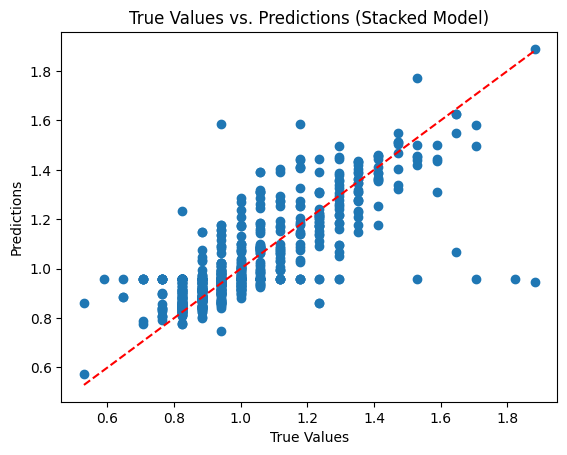

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor, Pool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Split your data
X_train, X_test, y_train, y_test = train_test_split(
    first_55_pcs_df,
    one_hot_encoded_df2['proficient_score'],
    test_size=0.2,
    random_state=42
)

# Step 3: CatBoost Model
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

catboost_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    cat_features=categorical_features_indices,
    eval_metric='RMSE'
)

catboost_model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10
)

# Predictions from CatBoost
cat_y_pred_train = catboost_model.predict(X_train)
cat_y_pred_test = catboost_model.predict(X_test)

# Step 4: Stack Predictions
# Create a new DataFrame for stacked predictions
stacked_train = np.column_stack((rf_y_pred_train, cat_y_pred_train))
stacked_test = np.column_stack((rf_y_pred_test, cat_y_pred_test))

# Step 2: Random Forest Model
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [20],
    'min_samples_split': [5]
}
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Predictions from Random Forest
rf_y_pred_train = best_rf_model.predict(X_train)
rf_y_pred_test = best_rf_model.predict(X_test)


# Fit a meta-model (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression

meta_model = LinearRegression()
meta_model.fit(stacked_train, y_train)

# Make final predictions using the meta-model
final_predictions = meta_model.predict(stacked_test)

# Evaluate the final model
final_mse = mean_squared_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"Stacked Model - MSE: {final_mse:.2f}, R²: {final_r2:.2f}, RMSE: {final_rmse:.2f}")

# Optional: Visualizing the performance of the stacked model
plt.scatter(y_test, final_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (Stacked Model)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.show()


# not needed (random extra models)

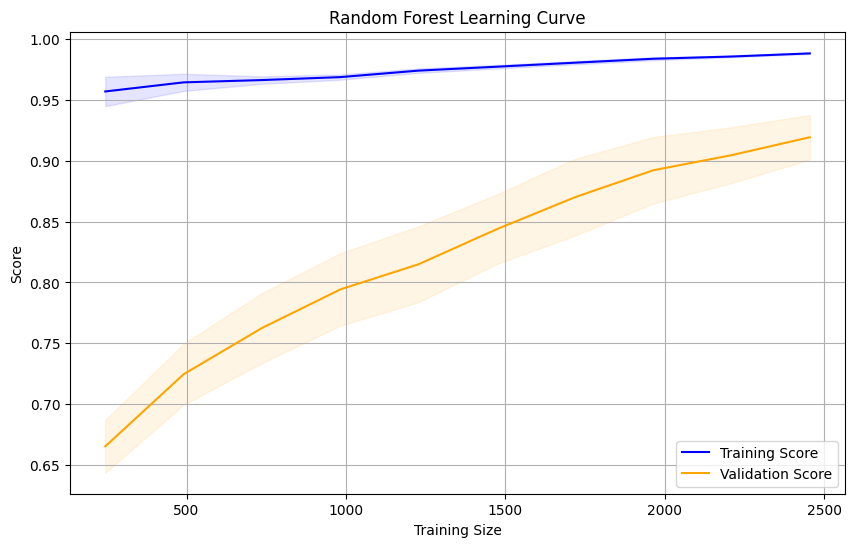

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate the mean and standard deviation for training scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate the mean and standard deviation for validation scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting the learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')

    # Plotting the standard deviation
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.1)

    # Adding titles and labels
    plt.title('Random Forest Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function with your Random Forest model and data
plot_learning_curve(rf_model, X_train, y_train)


In [121]:
from sklearn.svm import SVR

# Train Support Vector Regressor
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predictions
svr_y_pred = svr_model.predict(X_test)

# Evaluate
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)

print(f"Support Vector Regressor - MSE: {svr_mse:.2f}, R²: {svr_r2:.2f}, RMSE: {svr_rmse:.2f}")


Support Vector Regressor - MSE: 0.01, R²: 0.82, RMSE: 0.08


In [123]:
from sklearn.linear_model import Lasso

# Train Lasso
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)

# Predictions
lasso_y_pred = lasso_model.predict(X_test)

# Evaluate
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(lasso_mse)

print(f"Lasso Regression - MSE: {lasso_mse:.2f}, R²: {lasso_r2:.2f}, RMSE: {lasso_rmse:.2f}")


Lasso Regression - MSE: 0.03, R²: 0.33, RMSE: 0.16


In [124]:
from sklearn.linear_model import Ridge

# Train Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Predictions
ridge_y_pred = ridge_model.predict(X_test)

# Evaluate
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)

print(f"Ridge Regression - MSE: {ridge_mse:.2f}, R²: {ridge_r2:.2f}, RMSE: {ridge_rmse:.2f}")


Ridge Regression - MSE: 0.31, R²: -6.99, RMSE: 0.55
